<a href="https://colab.research.google.com/github/amalmon/RETAIL-SALES-PREDICTION/blob/main/AMAL_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

##### libraries

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly
import plotly.graph_objs as go
#import plotly.plotly as py
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [197]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [198]:
rossmann_stores_data=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone projects/Capstone project 2 ML regression /Rossmann Stores Data.csv',parse_dates=True,index_col = 'Date')

In [199]:
store_data=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone projects/Capstone project 2 ML regression /store.csv')

In [200]:
#have a glance on a datasets
print('observations & features',rossmann_stores_data.shape)
rossmann_stores_data.head()

observations & features (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [201]:
rossmann_stores_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [202]:
print('observations & features',store_data.shape)
store_data.head()

observations & features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# **Dealing With Missing Values**
Count missing values in each dataset

In [203]:
print('rossmann_stores_data:\n\n',rossmann_stores_data.isnull().sum(),
      '\n\nstore_data:\n\n',store_data.isnull().sum())

rossmann_stores_data:

 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 

store_data:

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


## **Remove features with high percentages of missing values**
we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.

In [204]:
#remove features
store_data=store_data.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1)

**Replace missing values in features with low percentages of missing values**

Text(0.5, 1.0, 'distribution of store competition distance')

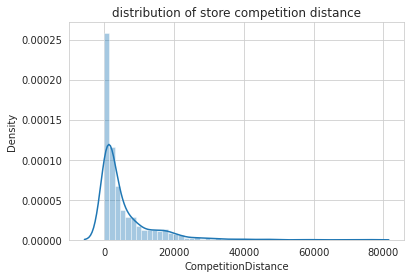

In [205]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution
sns.distplot(store_data.CompetitionDistance.dropna())
plt.title("distribution of store competition distance")

The distribution is right skewed, so we'll replace missing values with the median.

In [206]:
# replace missing values in CompetitionDistance with median for the store dataset
store_data.CompetitionDistance.fillna(store_data.CompetitionDistance.median(),inplace=True)

In [207]:
rossmann_stores_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1


## **2.3 Date Extraction**

In [208]:
# extract year, month, day and week of year from "Date"
rossmann_stores_data['year']=rossmann_stores_data.index.year
rossmann_stores_data['month']=rossmann_stores_data.index.month
rossmann_stores_data['day'] =rossmann_stores_data.index.day
rossmann_stores_data['weekofyear']=rossmann_stores_data.index.weekofyear
rossmann_stores_data=rossmann_stores_data.reset_index()


## **2.4 Joining Tables**

In [209]:
final_df=pd.merge(rossmann_stores_data,store_data,how='left',on='Store')
final_df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,weekofyear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [210]:
len(final_df)

1017209

### **2.5 Drop Subsets Of Data Where Might Cause Bias**

In [211]:
# where stores are closed, they won't generate sales, so we will remove this part of the dataset
final_df=final_df[final_df.Open!=0]

In [212]:
# Open isn't a variable anymore, so we'll drop it
#del df['Open']
final_df=final_df.drop('Open', axis=1)

In [213]:
# see if there's any opened store with zero sales
final_df[final_df.Sales==0]['Store'].sum()

31460

In [214]:
# see the percentage of open stored with zero sales
final_df[final_df.Sales==0]['Sales'].sum()/final_df.Sales.sum()

0.0

In [215]:
# remove this part of data to avoid bias
final_df=final_df[final_df.Sales!=0]

# **Feature Engineering**

In [216]:
# see what variable types we have
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 844338 non-null  datetime64[ns]
 1   Store                844338 non-null  int64         
 2   DayOfWeek            844338 non-null  int64         
 3   Sales                844338 non-null  int64         
 4   Customers            844338 non-null  int64         
 5   Promo                844338 non-null  int64         
 6   StateHoliday         844338 non-null  object        
 7   SchoolHoliday        844338 non-null  int64         
 8   year                 844338 non-null  int64         
 9   month                844338 non-null  int64         
 10  day                  844338 non-null  int64         
 11  weekofyear           844338 non-null  int64         
 12  StoreType            844338 non-null  object        
 13  Assortment   

In [217]:
# see what's in nominal varibles 
set(final_df.StateHoliday),set(final_df.StoreType),set(final_df.Assortment)

({0, '0', 'a', 'b', 'c'}, {'a', 'b', 'c', 'd'}, {'a', 'b', 'c'})

In [218]:
# StateHoliday indicates a state holiday - a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# convert number 0 to string 0
final_df.loc[final_df.StateHoliday==0,'StateHoliday']=final_df.loc[final_df.StateHoliday==0,'StateHoliday'].astype(str)

In [219]:
# make a copy in case I mess up anything 
df=final_df.copy()

In [220]:
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,weekofyear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,0,1,2015,7,31,31,a,a,29910.0,0


## **2.6.1 Create new variable "AvgSales"**

create a variable that calculates monthly average sales for each store

In [221]:
# calculate weekly average sales
sales=df[['year','month','Store','Sales']].groupby(['year','month','Store']).mean()
sales=sales.rename(columns={'Sales':'AvgSales'})
sales=sales.reset_index()

In [ ]:
sales

In [223]:
df['Sales_key']=df['year'].map(str)+df['month'].map(str)+df['Store'].map(str)
sales['Sales_key']=sales['year'].map(str) + sales['month'].map(str) + sales['Store'].map(str)

In [224]:
# drop extra columns
sales = sales.drop(['year','month','Store'], axis=1)
# merge
df = pd.merge(df, sales, how='left', on=('Sales_key'))

In [ ]:
df

### **2.6.2 Create new variable "AvgCustomer"**

create a variable that calculates Monthly average number of customers for each store, becuase daily number of customer is another variable to be predicted

In [226]:
customer=df[['year','month','Store','Customers']].groupby(['year','month','Store']).mean()
customer=customer.rename(columns={'Customers':'AvgCustomer'})
customer=customer.reset_index()

In [ ]:
customer

In [229]:
df['cust_key']=df['year'].map(str) + df['month'].map(str) + df['Store'].map(str)
customer['cust_key']=customer['year'].map(str) + customer['month'].map(str) + customer['Store'].map(str)


In [230]:
# drop original feature Customers
df = df.drop('Customers', axis=1)

In [231]:
# drop extra columns
customer = customer.drop(['year', 'month', 'Store'], axis=1)

In [232]:
# merge
df = pd.merge(df, customer, how="left", on=('cust_key'))

### **2.6.3 Transform Variable "StateHoliday"**

In [234]:
# 0 - not a state holiday; 1- is on a state holiday
df['StateHoliday']=df.StateHoliday.map({'0':0,'a':1,'b':1,'c':1,})

In [235]:
# drop extra columns
df=df.drop(['cust_key','Sales_key','Store','Date'], axis=1)

In [236]:
df

,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,year,month,day,weekofyear,StoreType,Assortment,CompetitionDistance,Promo2,AvgSales,AvgCustomer
0,5,5263,1,0,1,2015,7,31,31,c,a,1270.0,0,4491.333333,519.407407
1,5,6064,1,0,1,2015,7,31,31,a,a,570.0,1,4954.259259,621.222222
2,5,8314,1,0,1,2015,7,31,31,a,a,14130.0,1,6797.592593,682.888889
3,5,13995,1,0,1,2015,7,31,31,c,c,620.0,0,10256.851852,1294.259259
4,5,4822,1,0,1,2015,7,31,31,a,a,29910.0,0,4599.629630,521.703704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904201,2,3375,0,1,1,2013,1,1,1,b,a,150.0,0,11115.806452,1740.709677
904202,2,10765,0,1,1,2013,1,1,1,b,b,860.0,0,12984.677419,3059.548387
904203,2,5035,0,1,1,2013,1,1,1,b,b,840.0,1,7854.806452,2330.000000
904204,2,4491,0,1,1,2013,1,1,1,b,b,1430.0,0,4475.741935,1301.322581


##**EDA**

#### **heat map for correlation**

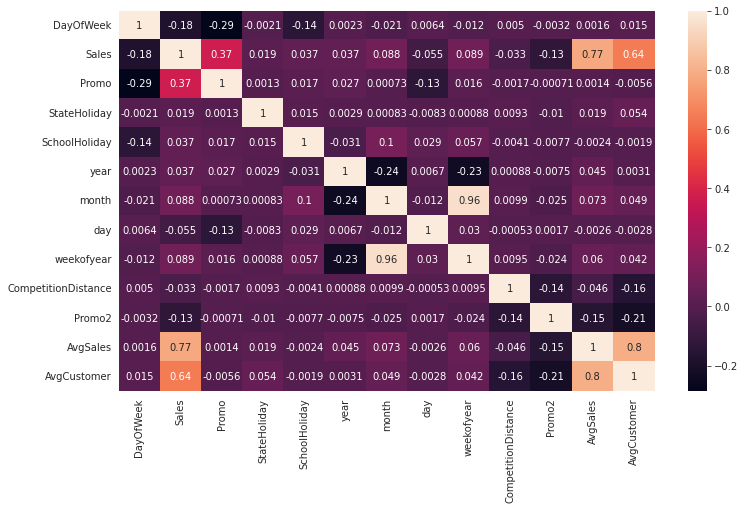

In [237]:
#for correlation matrix
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

Day of week v/s sales

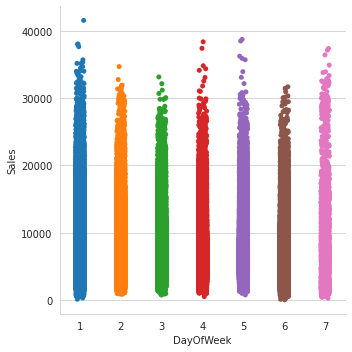

In [238]:
#catplot
sns.catplot(data=df,x='DayOfWeek',y='Sales')

## **visualization**

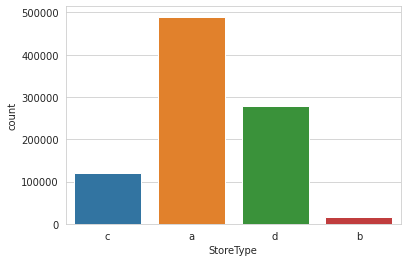

In [239]:
ax = sns.countplot(df['StoreType'])

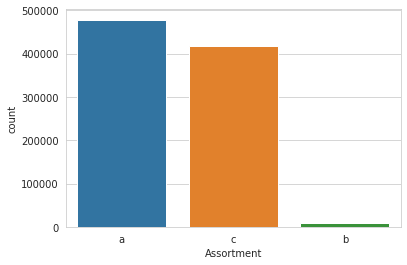

In [240]:
ax = sns.countplot(df['Assortment'])

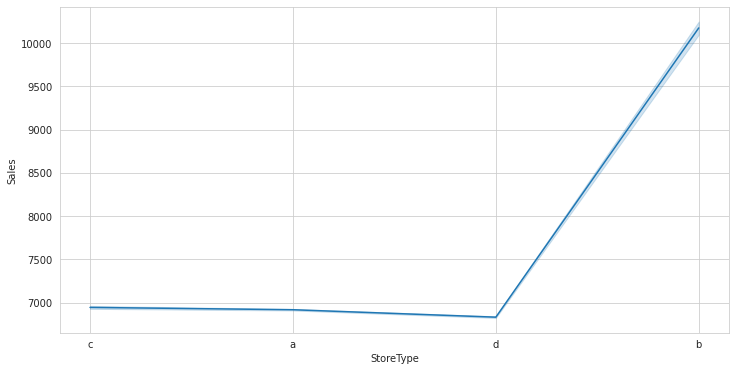

In [241]:
plt.figure(figsize=(12,6))
sns.lineplot(x='StoreType',y='Sales',data=df)

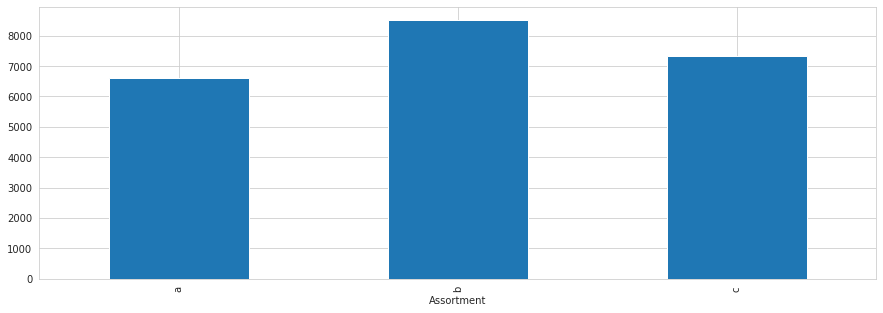

In [243]:
bplt1=df.groupby(['Assortment'])['Sales'].mean().plot.bar(figsize=(15,5))

**disrtibution of sales**

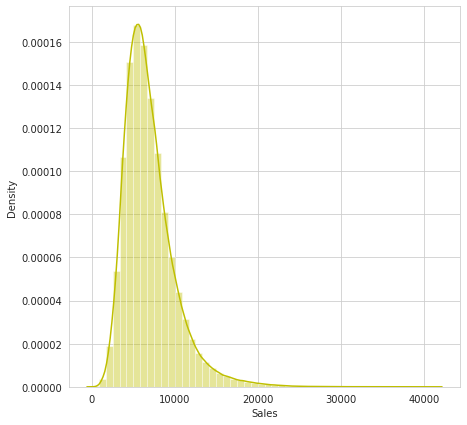

In [244]:
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'],color="y")

# STORE SALE PREDICTION

In [248]:
X=df.drop('Sales',axis=1)
Y=df.Sales

In [249]:
# get dummy variables for categorical features for linear regression
xd=X.copy()
xd=pd.get_dummies(xd)

In [250]:
xd

,DayOfWeek,Promo,StateHoliday,SchoolHoliday,year,month,day,weekofyear,CompetitionDistance,Promo2,AvgSales,AvgCustomer,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,1,0,1,2015,7,31,31,1270.0,0,4491.333333,519.407407,0,0,1,0,1,0,0
1,5,1,0,1,2015,7,31,31,570.0,1,4954.259259,621.222222,1,0,0,0,1,0,0
2,5,1,0,1,2015,7,31,31,14130.0,1,6797.592593,682.888889,1,0,0,0,1,0,0
3,5,1,0,1,2015,7,31,31,620.0,0,10256.851852,1294.259259,0,0,1,0,0,0,1
4,5,1,0,1,2015,7,31,31,29910.0,0,4599.629630,521.703704,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904201,2,0,1,1,2013,1,1,1,150.0,0,11115.806452,1740.709677,0,1,0,0,1,0,0
904202,2,0,1,1,2013,1,1,1,860.0,0,12984.677419,3059.548387,0,1,0,0,0,1,0
904203,2,0,1,1,2013,1,1,1,840.0,1,7854.806452,2330.000000,0,1,0,0,0,1,0
904204,2,0,1,1,2013,1,1,1,1430.0,0,4475.741935,1301.322581,0,1,0,0,0,1,0


In [251]:
# label nominal variables for tree based regression
xl=X.copy()

In [252]:
xl

,DayOfWeek,Promo,StateHoliday,SchoolHoliday,year,month,day,weekofyear,StoreType,Assortment,CompetitionDistance,Promo2,AvgSales,AvgCustomer
0,5,1,0,1,2015,7,31,31,c,a,1270.0,0,4491.333333,519.407407
1,5,1,0,1,2015,7,31,31,a,a,570.0,1,4954.259259,621.222222
2,5,1,0,1,2015,7,31,31,a,a,14130.0,1,6797.592593,682.888889
3,5,1,0,1,2015,7,31,31,c,c,620.0,0,10256.851852,1294.259259
4,5,1,0,1,2015,7,31,31,a,a,29910.0,0,4599.629630,521.703704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904201,2,0,1,1,2013,1,1,1,b,a,150.0,0,11115.806452,1740.709677
904202,2,0,1,1,2013,1,1,1,b,b,860.0,0,12984.677419,3059.548387
904203,2,0,1,1,2013,1,1,1,b,b,840.0,1,7854.806452,2330.000000
904204,2,0,1,1,2013,1,1,1,b,b,1430.0,0,4475.741935,1301.322581


In [253]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
xl.Assortment=label.fit_transform(xl.Assortment)
xl.StoreType=label.fit_transform(xl.StoreType)


In [254]:
xl

,DayOfWeek,Promo,StateHoliday,SchoolHoliday,year,month,day,weekofyear,StoreType,Assortment,CompetitionDistance,Promo2,AvgSales,AvgCustomer
0,5,1,0,1,2015,7,31,31,2,0,1270.0,0,4491.333333,519.407407
1,5,1,0,1,2015,7,31,31,0,0,570.0,1,4954.259259,621.222222
2,5,1,0,1,2015,7,31,31,0,0,14130.0,1,6797.592593,682.888889
3,5,1,0,1,2015,7,31,31,2,2,620.0,0,10256.851852,1294.259259
4,5,1,0,1,2015,7,31,31,0,0,29910.0,0,4599.629630,521.703704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904201,2,0,1,1,2013,1,1,1,1,0,150.0,0,11115.806452,1740.709677
904202,2,0,1,1,2013,1,1,1,1,1,860.0,0,12984.677419,3059.548387
904203,2,0,1,1,2013,1,1,1,1,1,840.0,1,7854.806452,2330.000000
904204,2,0,1,1,2013,1,1,1,1,1,1430.0,0,4475.741935,1301.322581


In [255]:
# split training and test datasets
from sklearn.model_selection import train_test_split

xd_test,xd_train,yd_test,yd_train=train_test_split(xd,Y,test_size=0.2,random_state=1)
xl_test,xl_train,yl_test,yl_train=train_test_split(xl,Y,test_size=0.2,random_state=1)

# linear regression

# Linear Regression

based on the ordinary least squares (OLS) method.

it is used to estimate the unknown parameters in amodel.

The method relies on minimizing the sum of squared residuals between the actual and predicted values

In [256]:

from sklearn.linear_model import LinearRegression
lin=LinearRegression()
linreg=lin.fit(xd_train,yd_train)

In [257]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(x,y):
  return sqrt(mean_squared_error(x,y))
  

In [258]:
# definte MAPE function (mean absolute percentage error function)
def mape(x, y):
  return np.mean(np.abs((x-y)/x))*100

In [259]:
# get cross validation scores 
yd_predicted=linreg.predict(xd_train)
yd_test_predicted=linreg.predict(xd_test)

In [260]:
print("Regresion Model Score" , ":" , linreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(xd_test, yd_test))
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.7466409480148145 , Out of Sample Test Score : 0.7490120991137882
Training RMSE : 1559.2395501826797 Testing RMSE : 1552.5942852464116
Training MAPE : 17.065218463521646 Testing MAPE : 17.041745922406033


# **LARS Lasso Regression**

In [261]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(xd_train, yd_train)

In [262]:
print("Regresion Model Score" , ":" , lasreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(xd_test, yd_test))

yd_predicted = lasreg.predict(xd_train)
yd_test_predicted = lasreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.7466258206717301 , Out of Sample Test Score : 0.7490007419351887
Training RMSE : 1559.2860983509252 Testing RMSE : 1552.6294122207762
Training MAPE : 17.062986131388122 Testing MAPE : 17.039063001903315


###**Bayesian Ridge Regression**

In [263]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(xd_train, yd_train)

In [264]:
# validation
print("Regresion Model Score" , ":" ,rdgreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , rdgreg.score(xd_test, yd_test))

yd_predicted = rdgreg.predict(xd_train)
yd_test_predicted = rdgreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.7466409176544324 , Out of Sample Test Score : 0.7490131964427404
Training RMSE : 1559.2396436056438 Testing RMSE : 1552.5908912411296
Training MAPE : 17.06501672440819 Testing MAPE : 17.041509379918867


## **Decision Tree Regression**

In [265]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(xl_train, yl_train)

In [266]:
print("Regresion Model Score" , ":" , treereg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , treereg.score(xl_test, yl_test))

yl_predicted = treereg.predict(xl_train)
yl_test_predicted = treereg.predict(xl_test)
print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Regresion Model Score : 0.880955758441989 , Out of Sample Test Score : 0.843284613746028
Training RMSE : 1068.805858601157 Testing RMSE : 1226.8385352366088
Training MAPE : 10.994124856841523 Testing MAPE : 12.717542882722299


## **Random Forest Regression**

In [267]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xl_train, yl_train)

In [269]:
print("Regresion Model Score" , ":" , rdfreg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(xl_test, yl_test))   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Regresion Model Score : 0.9832110996314299 , Out of Sample Test Score : 0.8898940441903993
Training RMSE : 401.38002475632317 Testing RMSE : 1028.340631205728
Training MAPE : 4.0609494190028785 Testing MAPE : 10.679580909467317
